# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Описание данных:
 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
 - balcony — число балконов
 - ceiling_height — высота потолков (м)
 - cityCenters_nearest — расстояние до центра города (м)
 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
 - first_day_exposition — дата публикации
 - floor — этаж
 - floors_total — всего этажей в доме
 - is_apartment — апартаменты (булев тип)
 - kitchen_area — площадь кухни в квадратных метрах (м²)
 - last_price — цена на момент снятия с публикации
 - living_area — жилая площадь в квадратных метрах (м²)
 - locality_name — название населённого пункта
 - open_plan — свободная планировка (булев тип)
 - parks_around3000 — число парков в радиусе 3 км
 - parks_nearest — расстояние до ближайшего парка (м)
 - ponds_around3000 — число водоёмов в радиусе 3 км
 - ponds_nearest — расстояние до ближайшего водоёма (м)
 - rooms — число комнат
 - studio — квартира-студия (булев тип)
 - total_area — площадь квартиры в квадратных метрах (м²)
 - total_images — число фотографий квартиры в объявлении

Посмотрим: "шапку" таблицы и первые 10 записей, параметры переменных, стат. характеристики, пропуски.

In [1]:
# импорт библиотек
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nu
# загрузка данных
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# просмотр информации о данных
data.info()

# просмотр статистических характеристик
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [2]:
# просмотр первых строк и шапки данных
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Нужно посмотреть квартиры с очень большой площадью, в частности, с площадью 900 кв.м.


In [3]:
rows = data['total_area'] > 400.0
display(data.loc[rows])


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000.0,483.90,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,NaN,...,26.40,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
3117,19,140000000.0,631.00,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.00,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3676,12,28789000.0,441.98,2019-01-23T00:00:00,4,NaN,6.0,NaN,6,NaN,...,35.05,NaN,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
4237,1,50000000.0,517.00,2017-10-14T00:00:00,7,NaN,4.0,332.0,3,NaN,...,22.00,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.00,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.00,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
5893,3,230000000.0,500.00,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,...,40.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
6221,8,34000000.0,470.30,2018-01-14T00:00:00,4,NaN,3.0,248.7,3,NaN,...,40.00,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0
6621,20,99000000.0,488.00,2017-04-09T00:00:00,5,2.95,20.0,216.0,17,NaN,...,50.00,NaN,Санкт-Петербург,27641.0,4598.0,1.0,646.0,1.0,368.0,351.0
8018,20,84000000.0,507.00,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,45.50,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
9826,1,43185328.0,494.10,2017-05-12T00:00:00,1,2.85,12.0,NaN,3,NaN,...,NaN,0.0,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,5.0


Нужно посмотреть квартиры с очень малой жилой площадью, в частности, с площадью 2 кв.м. Согласно СНиП 31-01-2003 минимальная жилая площадь - 14 кв.м., кухни - 5 кв.м.

In [4]:
rows = data['living_area'] < 14.0
display(data.loc[rows])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
101,4,3000000.0,37.00,2019-03-23T00:00:00,1,2.75,10.0,12.00,3,NaN,...,13.00,NaN,садовое товарищество Новая Ропша,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,5,4000000.0,21.40,2019-02-07T00:00:00,1,2.90,8.0,8.30,7,NaN,...,6.30,NaN,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
248,7,4100000.0,31.00,2015-08-02T00:00:00,1,3.00,17.0,10.00,6,False,...,NaN,0.0,Санкт-Петербург,39771.0,8672.0,1.0,139.0,0.0,NaN,637.0
352,3,5496074.0,48.60,2016-04-25T00:00:00,1,NaN,11.0,13.00,3,False,...,15.00,2.0,Санкт-Петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1,3000000.0,37.29,2019-04-15T00:00:00,1,NaN,19.0,10.08,10,NaN,...,16.88,NaN,Санкт-Петербург,37006.0,15157.0,0.0,NaN,0.0,NaN,7.0
23573,8,6290000.0,47.67,2019-03-20T00:00:00,1,3.60,12.0,13.59,12,NaN,...,17.87,2.0,Санкт-Петербург,35726.0,16028.0,1.0,253.0,2.0,99.0,19.0
23574,14,64990000.0,139.00,2015-11-24T00:00:00,3,3.00,8.0,3.00,8,NaN,...,16.00,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
23673,9,3100000.0,23.00,2018-03-19T00:00:00,1,2.80,9.0,12.60,1,NaN,...,5.00,2.0,Санкт-Петербург,11813.0,11881.0,1.0,262.0,1.0,442.0,41.0


Нужно посмотреть очень высокие потолки. Бывают 2-х этажные квартиры. Верояно, высота потолка более 10 метров - ошибка.

In [5]:
rows = data['ceiling_height'] > 10.0
display(data.loc[rows])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [6]:
# посмотрим долю неответов
s = (data.isna().sum()/data.shape[0]*100)
print(s)

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64


### Выводы

1. Максимальные  значения площади, похожи на правду - действительно, есть большие квартиры с большим количеством комнат. 
2. Медианное и среднее значения по многим показателям достаточно близки (стоимостные показатели не рассматриваем), хотя разброс и достаточно высок.
3. В данных есть пропуски. Больше всего пропусков в показателях: is_apartment, parks_nearest, ponds_nearest, balcony, ceiling_height.
4. Переменную balcony нужно перевести в тип int.
5. Переменную first_day_exposition нужно перевести в тип int.


## Предобработка данных

Изменим тип переменной first_day_exposition на дату

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Минимальное число комнат - 0. Являются ли они студиями?

In [8]:
zero_rooms = data[data['rooms']==0]['rooms'].count()
zero_studio = data[(data['rooms']==0)&(data['studio']==True)]['studio'].count()
print(zero_studio/zero_rooms)

0.700507614213198


В 70% случаев, 0 комнат указали владельцы студий. Заменим 0 на 1

In [9]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

Для неответов в переменной ceiling_height нет данных для замены на что-то, кроме медианы.

Согласно СНиП 2.08.01-89 "...Высота жилых помещений от пола до потолка должна быть не менее 2,5 м". Все, что меньше 2.5 - ошибка. Выбросы удаляем, заменяем на медиану.

In [10]:
data.drop(data[(data.ceiling_height>10) | (data.ceiling_height<2)].index, inplace=True)
data['ceiling_height'].fillna(data['ceiling_height'].median(),inplace=True)
data['ceiling_height'].describe()

count    23671.000000
mean         2.697867
std          0.231904
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

Для замены неответов в переменной floors_total нет данных для замены на что-то, кроме медианы.

In [11]:
data['floors_total'].fillna(data['floors_total'].median(),inplace=True)

Неответ в переменной is_apartment - отсутствие явления, то есть False. Переменную лучше сделать булевой, т.к. она отражает нили наличие, или отсутствие явления

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype(bool)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Распределим общую площадь на группы, согласно квантильным значениям. Заменим неответы на медианы по подгруппам.

In [13]:

def total_area_group(area):
    if area <= 40.0:
        return '1'
    if 40.0 < area <= 52.0:
        return '2'
    if 52.0 < area <= 69.9:
        return '3'
    if area >= 70.0:
        return '70 and more'
    return 'l'

data['total_area_group'] = data['total_area'].apply(total_area_group)

data.drop(data[data.total_area<14].index, inplace=True)

data['total_area'] = data['total_area'].fillna(data.groupby('total_area_group')['total_area'].transform('median'))
data['total_area'].isna().sum()
data['total_area'].describe()


count    23666.000000
mean        60.368033
std         35.665224
min         14.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

При корректировке неответов в living_area, необходимо соблюсти соотношение общей площади к жилой. Аналогично с площадью кухни.

В ряде случаев, допускается жилая площадь 8 кв.м.(для временного жилья). Значения меньше нужно удалить

In [14]:
data.drop(data[data.living_area<8].index,inplace=True)

In [15]:
#корректировка неответов в living_area
living_to_total_median = data['living_area'].median()/data['total_area'].median()
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_to_total_median)


В ряде случаев, допускается площадь кухни 5 кв.м. Значения меньше нужно удалить

In [16]:
data.drop(data[data.kitchen_area<5].index, inplace=True)

In [17]:
# корректировка неответов в kitchen_area
kitchen_to_total_median = data['kitchen_area'].median()/data['living_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_to_total_median)

Проверим, что жилая площадь не превышает общую

In [18]:
len(data.query('living_area > total_area'))

0

Удалим пропуски в переменной balcony

In [19]:
data['balcony'] = data['balcony'].fillna(0)

Неответы в locality_name восстановить невозможно, но таких записей всего 0,2%. Необходимо удалить. 

In [20]:
data.dropna(subset=['locality_name'], inplace=True)

У ряда переменных пропуски можно заменить на 0, т.к. неответ, скорее всего, означает 0

In [21]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5487
cityCenters_nearest      5464
parks_around3000            0
parks_nearest           15478
ponds_around3000            0
ponds_nearest           14474
days_exposition          3160
total_area_group            0
dtype: int64

Можно предположить, что переменная с названиями населенных пунктов содержит ошибки, опечатки и т.д.

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Действительно, присутствует написание слов и  через ё, и через е. Нужно поменять ё на е. Тип населенного пункта не имеет значения, удалим.

In [24]:
import re 
def new_cities_words(row):
    locality = row['locality_name'].replace('ё','е')
    return re.sub(r'\b[а-я]+\s*', "", locality).strip()
data['locality_name'] = data.apply(new_cities_words, axis=1)
data['locality_name'].value_counts().head(30)

Санкт-Петербург    15642
Мурино               583
Кудрово              472
Шушары               438
Всеволожск           398
Пушкин               366
Колпино              338
Парголово            327
Гатчина              301
Выборг               236
Петергоф             201
Сестрорецк           182
Красное Село         176
Новое Девяткино      144
Сертолово            142
Ломоносов            130
Кириши               124
Бугры                114
Сланцы               112
Волхов               109
Тосно                104
Кингисепп            104
Никольское            94
Кронштадт             92
Коммунар              89
Сосновый Бор          87
Кировск               82
Отрадное              79
Янино-1               68
Металлострой          66
Name: locality_name, dtype: int64

Посмотрим медиану переменных airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest

In [25]:
median_data = data.pivot_table(
    index='locality_name',
    values=['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest'],
    aggfunc='median'
)

display(median_data)

,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
locality_name,,,,
Александровская,12896.5,27468.0,NaN,711.5
Белоостров,57769.0,38868.0,NaN,320.0
Зеленогорск,72280.0,53379.0,147.0,507.0
Колпино,26232.0,32018.0,393.0,509.0
Красное Село,25705.5,29130.5,428.5,225.5
Кронштадт,67844.0,49570.0,286.0,313.0
Левашово,52693.0,25727.0,NaN,NaN
Лисий Нос,55909.0,28226.0,NaN,NaN
Ломоносов,48406.0,51677.0,407.0,553.0


Пропуски в parks_nearest и ponds_nearest нужно заменить на 0, т.к. данных для замены на медиану нет. Неответы в airports_nearest и cityCenters_nearest заменить на медиану

In [26]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

Данные о близости к центру города важны только для Санкт-Петербурга. Неответы в других населенных пунктах можно заменить на медиану.

In [27]:
city_non_SPB = data.query('(locality_name != "Санкт-Петербург") & (cityCenters_nearest == "nan")')
data.loc[(data['cityCenters_nearest'].isna())&(data['locality_name'] != "Санкт-Петербург"),
         'cityCenters_nearest'] = data['cityCenters_nearest'].median()
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

Пропуски в переменной airports_nearest заменим медианой

In [28]:
data['airports_nearest'].fillna(data['airports_nearest'].median(),inplace=True)

In [29]:
de_i  = data[data['days_exposition'].isna()]

In [30]:
de_n = data[data['days_exposition'].notna()]

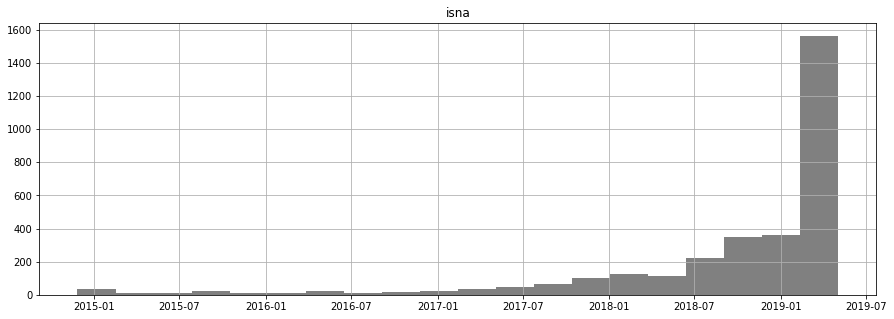

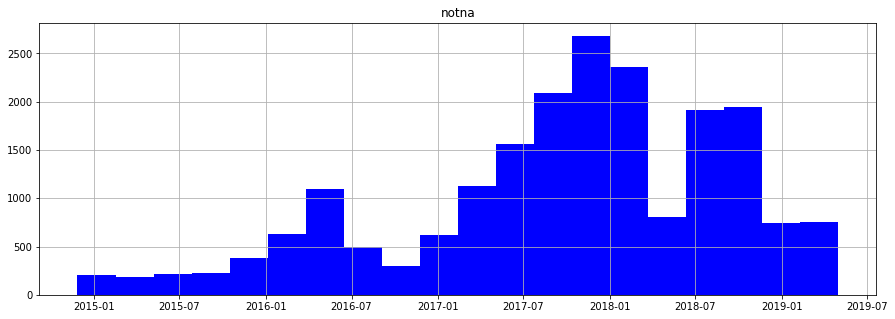

In [31]:
de_i.hist('first_day_exposition', bins=20, color='grey', figsize = (15, 5))
plt.title('isna')
plt.show()
de_n.hist('first_day_exposition', bins=20, color='blue', figsize = (15, 5))
plt.title('notna')
plt.show()

У ряда переменных не может быть дробной части, например, количество этажей.  У некоторых дробная часть не нужна, например, цена продажи. Заменим тип переменной на int.

In [32]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')

In [33]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23504 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23504 non-null  int64         
 1   last_price            23504 non-null  int64         
 2   total_area            23504 non-null  float64       
 3   first_day_exposition  23504 non-null  datetime64[ns]
 4   rooms                 23504 non-null  int64         
 5   ceiling_height        23504 non-null  float64       
 6   floors_total          23504 non-null  int64         
 7   living_area           23504 non-null  float64       
 8   floor                 23504 non-null  int64         
 9   is_apartment          23504 non-null  bool          
 10  studio                23504 non-null  bool          
 11  open_plan             23504 non-null  bool          
 12  kitchen_area          23504 non-null  float64       
 13  balcony         

None

In [34]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3160
total_area_group           0
dtype: int64

Проверка дубликатов

In [35]:
data.duplicated().sum()

0

###  Выводы
1. Основная часть данных, отчищена от неответов.
2. Проведена замена типа переменной, там, где это целесообразно.
3. Исключены слишком спорные наблюдения

## Расчёты и добавление результатов в таблицу

Добавление в таблицу цены квадратного метра

In [36]:
data['price_per_meter'] = data.last_price/data.total_area

Добавление в таблицу дня недели, месяца и года публикации объявления

In [37]:
data['day_exposition'] = data.first_day_exposition.dt.day
data['day_of_week_exposition'] = data.first_day_exposition.dt.dayofweek
data['month_exposition'] = data.first_day_exposition.dt.month
data['year_exposition'] = data.first_day_exposition.dt.year

week_dict={0:'Пн', 1:'Вт', 2:'Ср', 3:'Чт', 4:'Пт', 5:'Сб', 6:'Вс'}
data['day_of_week_exposition'].replace(week_dict, inplace=True)
data['day_of_week_exposition'] = data['day_of_week_exposition'].astype('category')

Добавление в таблицу этажа квартиры; варианты — первый, последний, другой.

In [38]:
def floor_number(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

data['floor_number'] = data.apply(lambda row: floor_number(row.floor, row.floors_total), axis=1).astype('category')

Добавление в таблицу соотношения жилой и общей площади, а также отношения площади кухни к общей

In [39]:
data['living/total'] = data.living_area / data.total_area
data['kitchen/total'] = data.kitchen_area / data.total_area

In [40]:
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_area_group,price_per_meter,day_exposition,day_of_week_exposition,month_exposition,year_exposition,floor_number,living/total,kitchen/total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,NaN,70 and more,120370.370370,7,Чт,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,81.0,2,82920.792079,4,Вт,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,558.0,3,92785.714286,20,Чт,8,2015,другой,0.612500,0.148214


### Выводы
1. Согласно задания проведены расчеты, в таблицу добавлены новые переменные

## Исследовательский анализ данных

### Анализ параметров: площадь, цена, число комнат, высота потолков.

Посмотрим на графическое отображение следующих параметров: площадь, цена, число комнат, высота потолков

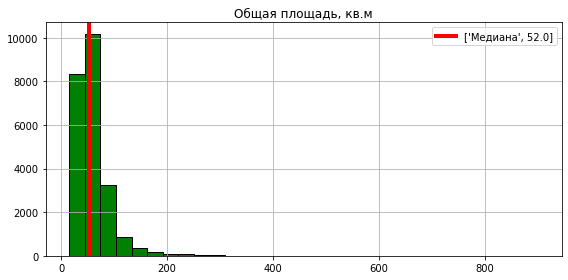

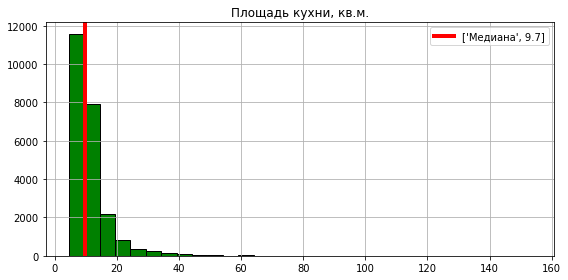

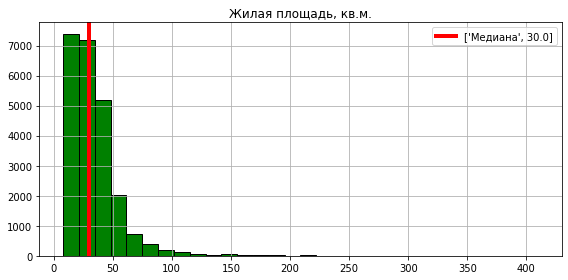

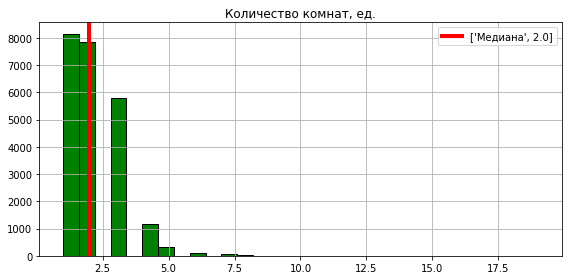

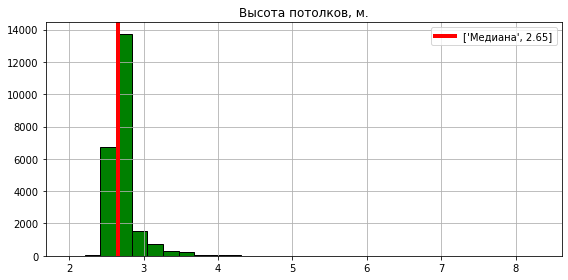

In [41]:
flat_var = {'total_area':'Общая площадь, кв.м',
                  'kitchen_area':'Площадь кухни, кв.м.',
                  'living_area':'Жилая площадь, кв.м.',
                  'rooms':'Количество комнат, ед.',
                  'ceiling_height':'Высота потолков, м.'}

for key, value in flat_var.items():
    data[key].hist(edgecolor='black', bins=30,color='green', figsize=(8,4)).set(title=value)
    plt.axvline(x=data[key].median(), color='red', lw=4, label=['Медиана',round(data[key].median(),2)])
    plt.legend() 
    plt.tight_layout()
    plt.show()

Посмотрим описательные статистики

In [42]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,living/total,kitchen/total
count,23504.000000,2.350400e+04,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,...,23504.000000,23504.000000,23504.000000,20344.000000,2.350400e+04,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000
mean,9.867554,6.557064e+06,60.457223,2.080837,2.698080,10.683288,34.676833,5.898358,11.251588,0.591133,...,167.618661,0.590240,199.144699,180.919829,9.942744e+04,15.480854,6.401889,2017.369426,0.565349,0.199114
std,5.681818,1.091964e+07,35.706997,1.067568,0.232072,6.576090,22.422588,4.882259,7.114013,0.958635,...,307.229040,0.883279,305.171376,219.920625,5.021098e+04,8.643165,3.491931,1.038002,0.100591,0.077644
min,0.000000,1.219000e+04,15.000000,1.000000,2.000000,1.000000,8.000000,1.000000,4.600000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.118349e+02,1.000000,1.000000,2014.000000,0.134615,0.025381
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,...,0.000000,0.000000,0.000000,45.000000,7.666667e+04,8.000000,3.000000,2017.000000,0.500000,0.137255
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.700000,0.000000,...,0.000000,0.000000,0.000000,95.000000,9.500000e+04,15.000000,6.000000,2017.000000,0.576923,0.182733
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.200000,8.000000,12.573333,1.000000,...,302.000000,1.000000,390.000000,231.000000,1.142488e+05,23.000000,10.000000,2018.000000,0.630594,0.258065
max,50.000000,7.630000e+08,900.000000,19.000000,8.300000,60.000000,409.700000,33.000000,153.333333,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,31.000000,12.000000,2019.000000,1.000000,0.787879


Для большей наглядности, посмотрим те же характеристики, но в другом виде диаграмм

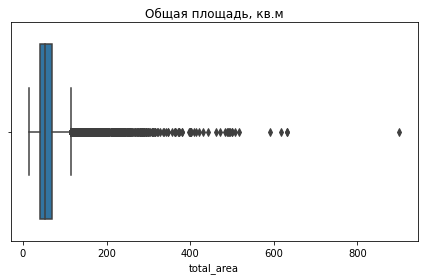

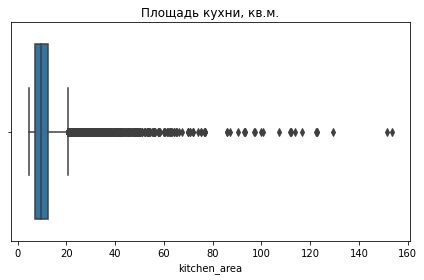

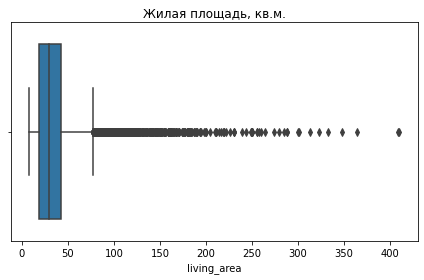

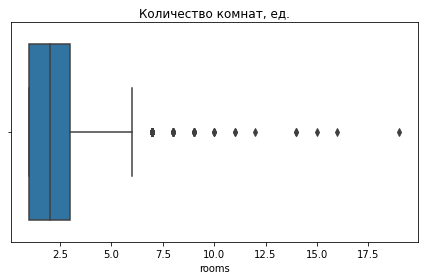

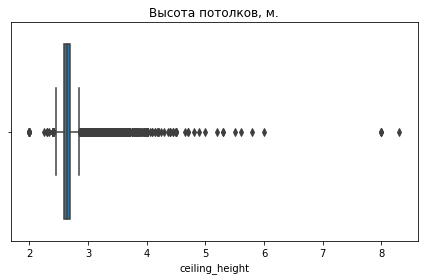

In [43]:
flat_var = {'total_area':'Общая площадь, кв.м',
                  'kitchen_area':'Площадь кухни, кв.м.',
                  'living_area':'Жилая площадь, кв.м.',
                  'rooms':'Количество комнат, ед.',
                  'ceiling_height':'Высота потолков, м.'}

for key, value in flat_var.items():
    sns.boxplot(x=data[key]).set(title=value)
    plt.tight_layout()
    plt.show()

Медианные значения:
 - общая площадь - 52.0 кв.м.
 - жилая площадь - 30.0 кв.м.
 - площадь кухни - 9.7 кв.м.
 - высота потолков - 2.65 м.
Основная масса наблюдений находится в интервалах:
 - общая площадь - 40.0 - 70.0 кв.м.
 - жилая площадь - 19.0 - 42.2 кв.м.
 - площадь кухни - 7.3 - 12.6 кв.м.
 - высота потолков - 2.6 - 2.7 м.
 
В целом, чаще всего продаются типичные 1,2, 3-х комнатные квартиры со стандартной планировкой. Сегмент нетипичных квартир был виден на предобработке данных. Это очень большие квартиры, 2-х этажные квартиры и крайне маленькие квартиры, которые, скорее всего предназначались для временного проживания.   

### Анализ времени продажи квартиры

Посмотрим описательные статистики пременной

In [44]:
data.days_exposition.describe()

count    20344.000000
mean       180.919829
std        219.920625
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Графическое отображение:

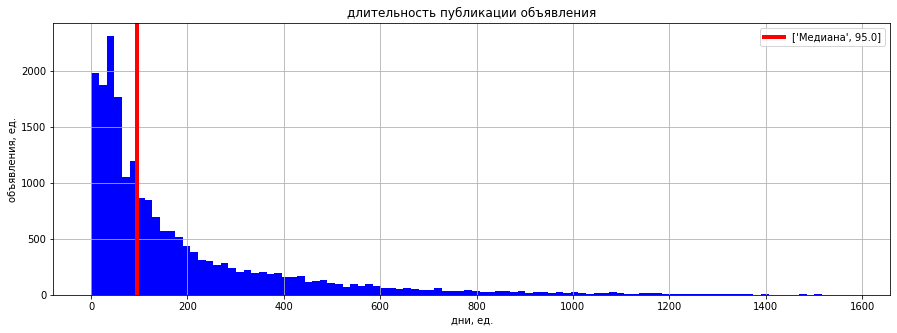

In [45]:
data.hist('days_exposition', bins=100, color='blue', figsize = (15, 5))
plt.title('длительность публикации объявления')
plt.xlabel('дни, ед.')
plt.ylabel('объявления, ед.')
plt.axvline(x=data['days_exposition'].median(), 
            color='red', lw=4, label=['Медиана',round(data['days_exposition'].median(),2)])
plt.legend() 
plt.show()

В половине случаев, квартира продается за 95 дней. Быстрой продажей является до 45 дней, долгой - 198 дней. Среднее время продажи квартиры - 169 дней.

### Редкие и выбивающиеся значения

Редкими и выбивающимися значениями будут значения, находящиеся за границами межквантильного размаха. Исключать их все нельзя. Исключим по 5% с каждой стороны.

In [46]:
data['last_price'] = data['last_price'].clip(lower = data['last_price'].quantile(0.05),\
                                         upper = data['last_price'].quantile(0.95))

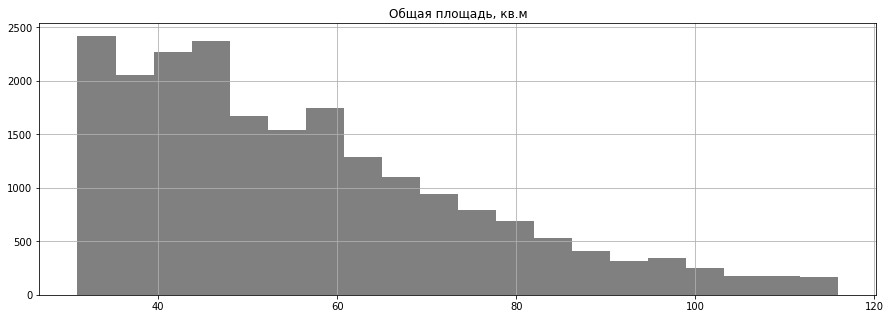

In [47]:
total_area1_3 = data.query('total_area.quantile(0.05)<=total_area<= total_area.quantile(0.95)')
total_area1_3.hist('total_area', bins=20, color='grey', figsize = (15, 5))
plt.title('Общая площадь, кв.м')
plt.show()

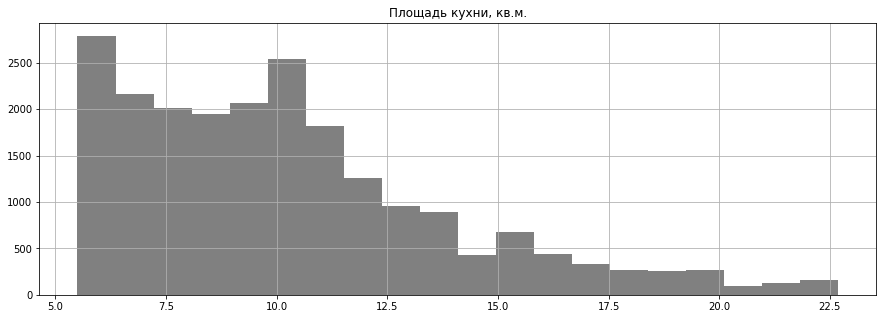

In [48]:
kitchen_area1_3 = data.query('kitchen_area.quantile(0.05)<=kitchen_area<= kitchen_area.quantile(0.95)')
kitchen_area1_3.hist('kitchen_area', bins=20, color='grey', figsize = (15, 5))
plt.title('Площадь кухни, кв.м.')
plt.show()

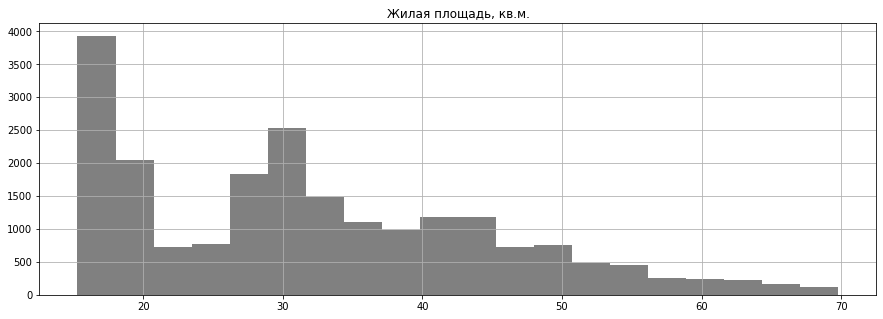

In [49]:
living_area1_3 = data.query('living_area.quantile(0.05)<=living_area<= living_area.quantile(0.95)')
living_area1_3.hist('living_area', bins=20, color='grey', figsize = (15, 5))
plt.title('Жилая площадь, кв.м.')
plt.show()

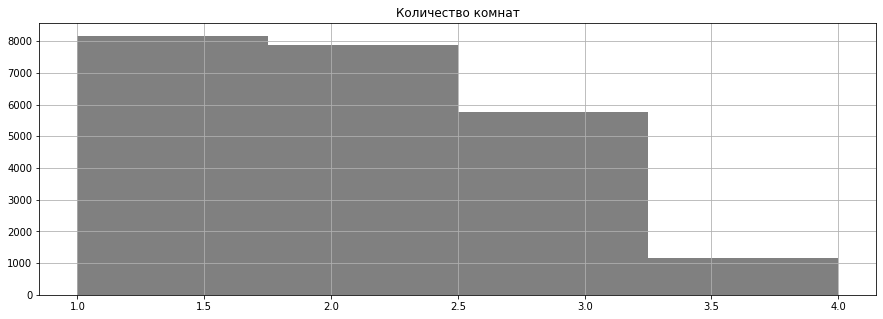

In [50]:
rooms1_3 = data.query('rooms.quantile(0.05)<=rooms<= rooms.quantile(0.95)')
rooms1_3.hist('rooms', bins=4, color='grey', figsize = (15, 5))
plt.title('Количество комнат')
plt.show()

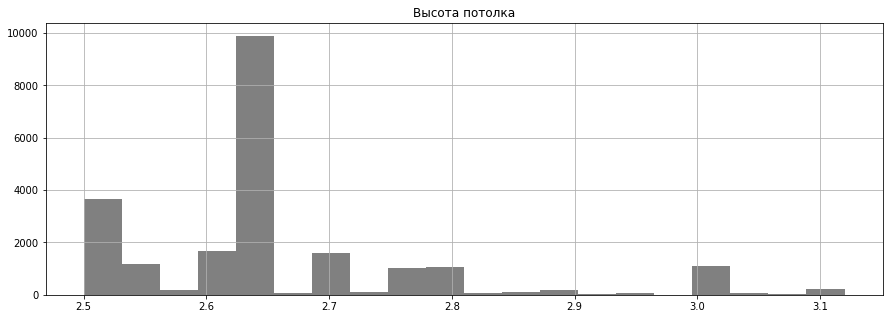

In [51]:
ceiling_height1_3 = data.query('ceiling_height.quantile(0.05)<=ceiling_height<= ceiling_height.quantile(0.95)')
ceiling_height1_3.hist('ceiling_height', bins=20, color='grey', figsize = (15, 5))
plt.title('Высота потолка')
plt.show()

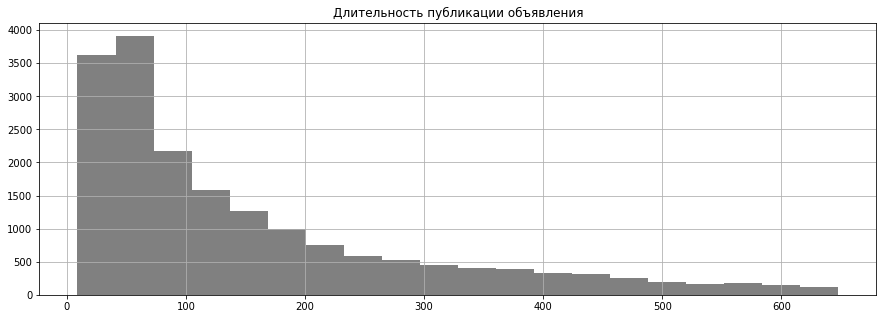

In [52]:
days_exposition1_3 = data.query('days_exposition.quantile(0.05)<=days_exposition<= days_exposition.quantile(0.95)')

days_exposition1_3.hist('days_exposition', bins=20, color='grey', figsize = (15, 5))
plt.title('Длительность публикации объявления')
plt.show()


1. Редкие и выбивающиеся значения есть во всех переменных, но исключать их все нельзя, лучше удалить по 5% с каждой стороны.

### Факторы, влияющие на цену квартиры

Какие факторы больше всего влияют на стоимость квартиры? Зависит ли цена от площади, числа комнат, удалённости от центра. Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Зависимость от даты размещения: дня недели, месяца и года.

Зависимость цены от площади квартиры и количества комнат, удаленности от центра

In [53]:
print('Зависимость цены параметров')
print(total_area1_3['total_area'].corr(total_area1_3['last_price']), 'коэф. Пирсона цена х общая площадь')
print(kitchen_area1_3['kitchen_area'].corr(kitchen_area1_3['last_price']), 'коэф. Пирсона цена х площадь кухни')
print(living_area1_3['living_area'].corr(living_area1_3['last_price']), 'коэф. Пирсона цена х жилая площадь')
print(rooms1_3['rooms'].corr(rooms1_3['last_price']), 'коэф. Пирсона цена х количество комнат')
print(data['cityCenters_nearest'].corr(data['last_price']), 'коэф. Пирсона цена х удаленность от центра')

Зависимость цены параметров
0.7363368305843904 коэф. Пирсона цена х общая площадь
0.5012452353688875 коэф. Пирсона цена х площадь кухни
0.610613637298471 коэф. Пирсона цена х жилая площадь
0.5006756757320391 коэф. Пирсона цена х количество комнат
-0.33093180413185447 коэф. Пирсона цена х удаленность от центра


Есть средняя зависимость цены и общей площади.

Зависимость цены от этажа

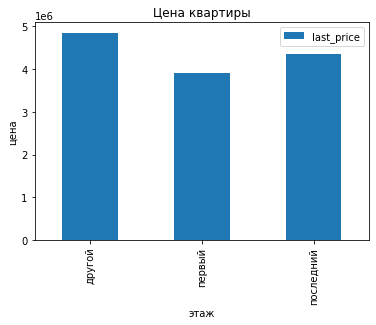

In [54]:
data.pivot_table(index='floor_number', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Цена квартиры')
plt.xlabel('этаж')
plt.ylabel('цена')
plt.show()

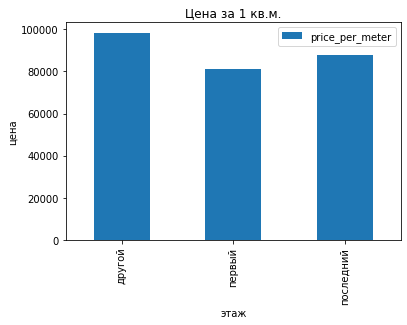

In [55]:
data.pivot_table(index='floor_number', values='price_per_meter', aggfunc='median').plot(kind='bar')
plt.title('Цена за 1 кв.м.')
plt.xlabel('этаж')
plt.ylabel('цена')
plt.show()

Самая низкая стоимость квартир - на первом этаже. Чуть выше стоимость на последнем этаже. Стоимость квартир на этажах, не относящихся к первому и последнему заметно выше.

Зависимость от даты размещения: дня недели, месяца и года

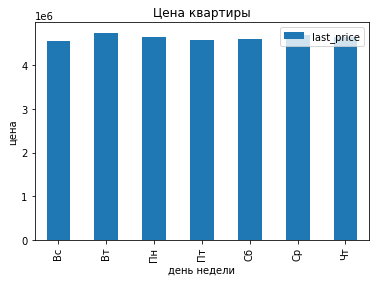

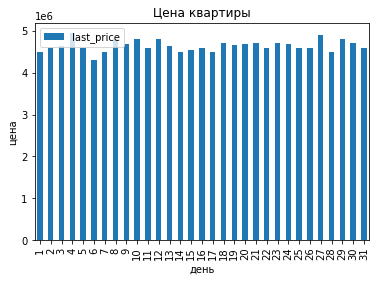

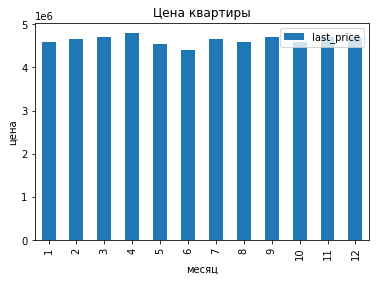

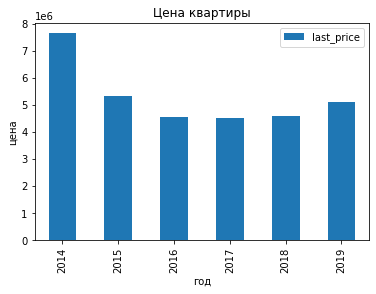

In [56]:
data.pivot_table(index='day_of_week_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Цена квартиры')
plt.xlabel('день недели')
plt.ylabel('цена')
plt.show()

data.pivot_table(index='day_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Цена квартиры')
plt.xlabel('день')
plt.ylabel('цена')
plt.show()

data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Цена квартиры')
plt.xlabel('месяц')
plt.ylabel('цена')
plt.show()

data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Цена квартиры')
plt.xlabel('год')
plt.ylabel('цена')
plt.show()


Зависимости цены квартиры от дня  публикации нет. Летом стоимость квартир снижается. После 2014 года стоимость квартир снизилась. В 2016 - 2018 годах динамики не было, в 2019 году цены выросли.

### 10 населённых пунктов с наибольшим числом объявлений

Посмотрим на 10 населённых пунктов с наибольшим числом объявлений и среднюю цену за 1 кв.м.

In [57]:
locality_top10 = data['locality_name'].value_counts().head(10).index
print(locality_top10)

Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Выборг'],
      dtype='object')


In [58]:
data[data.locality_name.isin(locality_top10)].pivot_table(index='locality_name', 
                                                          values='price_per_meter', aggfunc = 'mean')

,price_per_meter
locality_name,
Всеволожск,68654.473986
Выборг,58188.871381
Гатчина,68858.478941
Колпино,75424.579098
Кудрово,95324.930544
Мурино,85942.165474
Парголово,90175.913458
Пушкин,103188.211357
Санкт-Петербург,114775.820395


Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге, самая низкая - в Выборге.

*Квартиры в Санкт-Петербурге*

Создадим столбец с расстоянием до центра в километрах, округлим до целых значений.

In [59]:
data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).round()


Средняя цена для каждого километра

In [60]:
data_spb = data.loc[data['locality_name'] == 'Санкт-Петербург']
data_spb_km_price = data_spb.pivot_table(index='cityCenters_km', values='price_per_meter', aggfunc='mean').round()


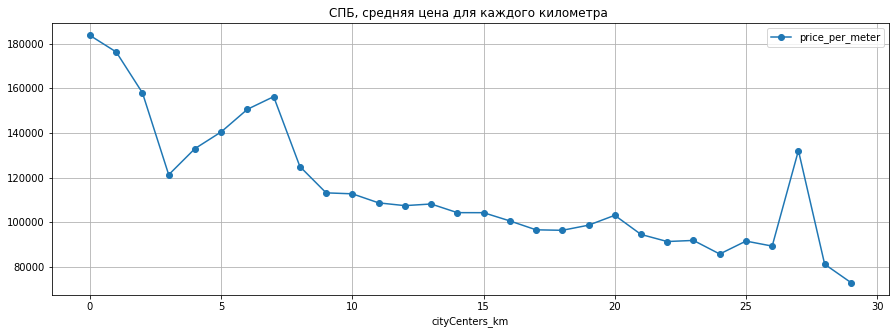

In [61]:
# Определение центра города
data_spb_km_price.plot(y='price_per_meter', style='o-', grid=True, figsize=(15, 5),title='СПБ, средняя цена для каждого километра ')
plt.show()

Начиная с 7 км. от центра города, цена начинает снижаться

In [62]:
data_spb_center = data_spb.loc[data_spb['cityCenters_km'] <= 7]
data_spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,month_exposition,year_exposition,living/total,kitchen/total,cityCenters_km
count,3565.000000,3.565000e+03,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,...,3565.000000,3565.000000,2946.000000,3.565000e+03,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000
mean,10.234222,9.968319e+06,93.408011,2.837588,2.937265,7.169705,55.166682,4.237588,16.093411,0.325666,...,1.272931,330.463955,247.308215,1.452500e+05,15.639832,6.405610,2017.190463,0.580651,0.186876,4.424404
std,5.990626,3.904234e+06,59.688073,1.443761,0.372572,3.916508,38.338404,2.999521,12.215740,0.765213,...,1.093989,310.393890,272.868277,9.345666e+04,8.627331,3.458406,1.131341,0.109704,0.088320,1.773106
min,0.000000,1.891050e+06,15.500000,1.000000,2.400000,2.000000,8.300000,1.000000,4.753333,0.000000,...,0.000000,0.000000,3.000000,1.534527e+04,1.000000,1.000000,2014.000000,0.141304,0.025381,0.000000
25%,6.000000,6.690000e+06,57.000000,2.000000,2.650000,5.000000,31.600000,2.000000,9.200000,0.000000,...,0.000000,0.000000,60.000000,9.985714e+04,9.000000,3.000000,2017.000000,0.522727,0.121025,3.000000
50%,10.000000,9.200000e+06,78.610000,3.000000,2.800000,6.000000,46.000000,4.000000,12.350000,0.000000,...,1.000000,265.000000,141.000000,1.235849e+05,16.000000,6.000000,2017.000000,0.581395,0.160000,5.000000
75%,15.000000,1.450000e+07,110.000000,3.000000,3.150000,9.000000,67.000000,5.000000,18.400000,0.000000,...,2.000000,573.000000,347.750000,1.559767e+05,23.000000,10.000000,2018.000000,0.656357,0.240000,6.000000
max,50.000000,1.535000e+07,631.200000,19.000000,6.000000,25.000000,409.000000,25.000000,153.333333,5.000000,...,3.000000,1293.000000,1572.000000,1.907500e+06,31.000000,12.000000,2019.000000,0.983447,0.636986,7.000000


Удалим по 5% выбросов с каждой стороны и посмотрим параметры квартир в центре города

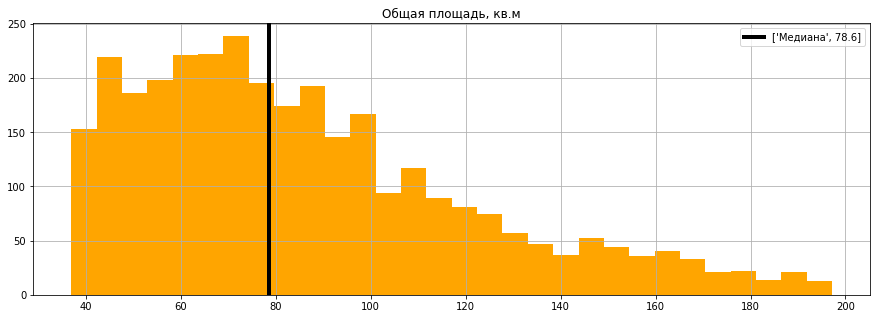

In [63]:
total_area1_3_spb = data_spb_center.query('total_area.quantile(0.05)<=total_area<= total_area.quantile(0.95)')
total_area1_3_spb.hist('total_area', bins=30, color='orange', figsize = (15, 5))
plt.title('Общая площадь, кв.м')
plt.axvline(x=total_area1_3_spb['total_area'].median(), color='black', lw=4, label=['Медиана',round(total_area1_3_spb['total_area'].median(),2)])
plt.legend() 
plt.show()

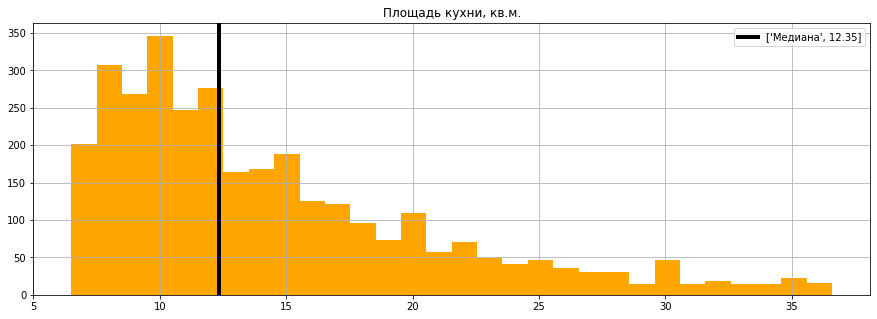

In [64]:
kitchen_area1_3_spb = data_spb_center.query('kitchen_area.quantile(0.05)<=kitchen_area<= kitchen_area.quantile(0.95)')
kitchen_area1_3_spb.hist('kitchen_area', bins=30, color='orange', figsize = (15, 5))
plt.title('Площадь кухни, кв.м.')
plt.axvline(x=kitchen_area1_3_spb['kitchen_area'].median(), color='black', lw=4, 
            label=['Медиана',round(kitchen_area1_3_spb['kitchen_area'].median(),2)])
plt.legend() 
plt.show()

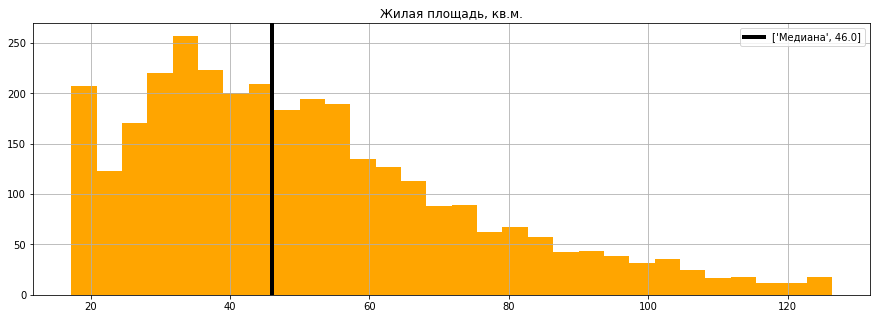

In [65]:
living_area1_3_spb = data_spb_center.query('living_area.quantile(0.05)<=living_area<= living_area.quantile(0.95)')
living_area1_3_spb.hist('living_area', bins=30, color='orange', figsize = (15, 5))
plt.title('Жилая площадь, кв.м.')
plt.axvline(x=living_area1_3_spb['living_area'].median(), color='black', lw=4, 
            label=['Медиана',round(living_area1_3_spb['living_area'].median(),2)])
plt.legend() 
plt.show()

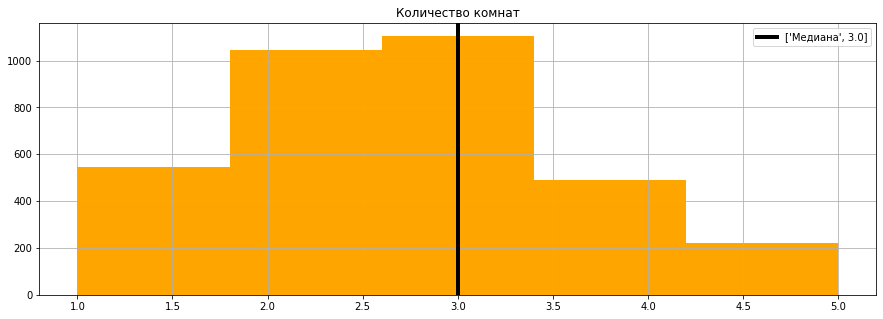

In [66]:
rooms1_3_spb = data_spb_center.query('rooms.quantile(0.05)<=rooms<= rooms.quantile(0.95)')
rooms1_3_spb.hist('rooms', bins=5, color='orange', figsize = (15, 5))
plt.title('Количество комнат')
plt.axvline(x=rooms1_3_spb['rooms'].median(), color='black', lw=4, label=['Медиана',round(rooms1_3_spb['rooms'].median(),2)])
plt.legend() 
plt.show()

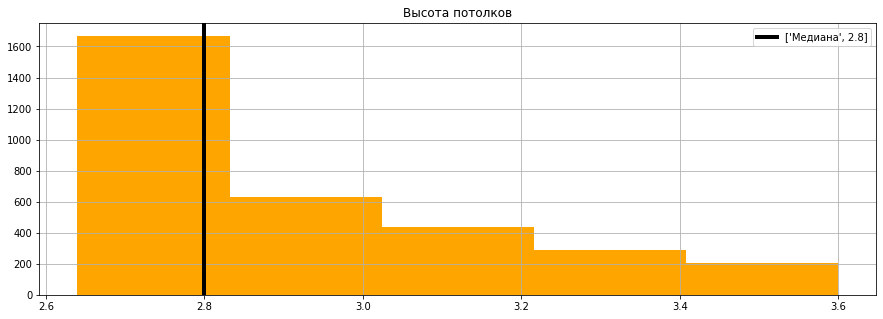

In [67]:
ceiling_height1_3_spb = data_spb_center.query('ceiling_height.quantile(0.05)<=ceiling_height<= ceiling_height.quantile(0.95)')
ceiling_height1_3_spb.hist('ceiling_height', bins=5, color='orange', figsize = (15, 5))
plt.title('Высота потолков')
plt.axvline(x=ceiling_height1_3_spb['ceiling_height'].median(), color='black', lw=4, 
            label=['Медиана',round(ceiling_height1_3_spb['ceiling_height'].median(),2)])
plt.legend() 
plt.show()

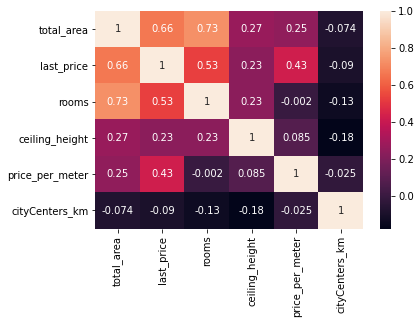

In [68]:
# посмотрим корреляции
spb_center_corr = data_spb_center[['total_area', 'last_price', 'rooms', 
                                   'ceiling_height','price_per_meter', 'cityCenters_km']]
sns.heatmap(spb_center_corr.corr(), annot=True)
plt.show()

Есть средняя зависимость цены от размера квартиры.

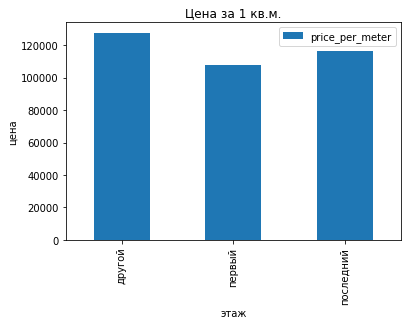

In [69]:
# посмотрим цену по этажам
data_spb_center.pivot_table(index='floor_number', values='price_per_meter', aggfunc='median').plot(kind='bar')
plt.title('Цена за 1 кв.м.')
plt.xlabel('этаж')
plt.ylabel('цена')
plt.show()

Квартиры на этажах, кроме первого и последнего, стоят дороже. 

### Выводы
1. Очень заметной, кроме цены, разницы в жилом фонде нет.
2. Квартиры в Санкт-Петербурге, особенно в центре, стоят дороже
3. В  центре Санкт-Петербурга 1-комнатных квартир, выставленных на продажу, меньше, чем в целом по выборке.
4. К продаже в Санкт-Петербурге предлагаются, в основном, 2-х и 3-х комнатные квартиры, площадью от 57 до 110 кв.м. В целом по выборке 1, 2, 3- комнатные квартиры, площадью от 40 до 69.9 кв. м.

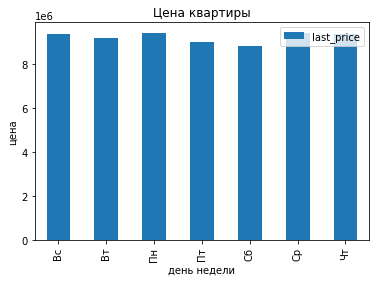

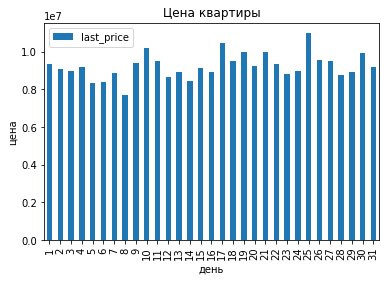

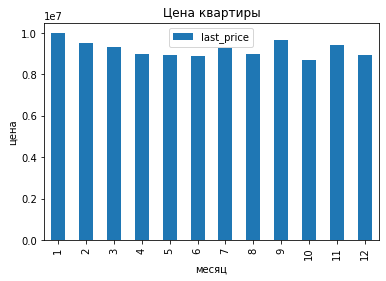

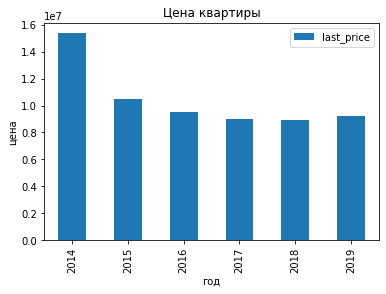

In [73]:
data_spb_center.pivot_table(index='day_of_week_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Цена квартиры')
plt.xlabel('день недели')
plt.ylabel('цена')
plt.show()

data_spb_center.pivot_table(index='day_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Цена квартиры')
plt.xlabel('день')
plt.ylabel('цена')
plt.show()

data_spb_center.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Цена квартиры')
plt.xlabel('месяц')
plt.ylabel('цена')
plt.show()

data_spb_center.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(kind='bar')
plt.title('Цена квартиры')
plt.xlabel('год')
plt.ylabel('цена')
plt.show()

## Общий вывод

1. Самые дорогие квартиры в Санкт-Петербурге, самые дешевые в Выборге.
2. Стоимость квартир летом снижается.
3. Начиная с 2019 года наблюдается рост стоимости квартир.
4. Цена квартир в центре Санкт-Петербурга стабильна с 2017 года.
5. В половине случаев, длительность реализации квартиры - около 3-х месяцев.
6. Основным фактором, влияющим на стоимость квартиры является метраж.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод